In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# load your time series data into a Pandas DataFrame or Series
data = pd.read_csv("../assets/csv/df_date_item_no.csv", index_col=0)

# data.index.freq = 'D'

data = data.rename_axis('date', axis=1)
# change the datatype of the index to datetime
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

In [2]:
# split your data into training and testing sets
from sklearn.model_selection import train_test_split
item_name = 'whole milk'
order = '2d'
data = data[[item_name,]].resample(order).sum()
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [3]:
data.head()

date,whole milk
2014-01-01,6.0
2014-01-03,2.0
2014-01-05,7.0
2014-01-07,13.0
2014-01-09,1.0


RMSE: 3.727
MAE: 2.919
MAPE: 0.536%


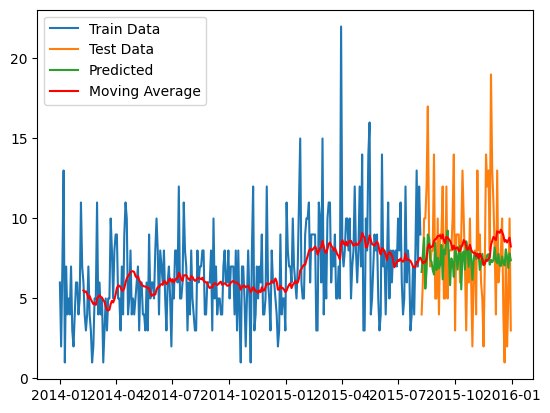

In [4]:
# create the AR model and fit it to the training data
model = AutoReg(train_data, lags=50)  # use the previous time step as the lag
model_fit = model.fit()

# make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# calculate the Root Mean Squared Error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {round(rmse, 3)}')

mae = (mean_absolute_error(test_data, predictions))
print(f'MAE: {round(mae, 3)}')
mape = (mean_absolute_percentage_error(test_data, predictions))
print(f'MAPE: {round(mape, 3)}%')

# plot the actual vs. predicted values
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Predicted')
plt.plot(data.rolling(window=20).mean(), color = 'red', label = 'Moving Average')
plt.legend()
plt.show()